In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
import zipfile
import matplotlib.pyplot as plt
import random

from tensorflow.keras import layers, models

print(f"TF Version: {tf.__version__}")

TF Version: 2.8.2


In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import zipfile

zip_file = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning/traffic-signs-data.zip"

zip_obj = zipfile.ZipFile(file=zip_file, mode="r")
zip_obj.extractall("./")
zip_obj.close()

In [6]:
with open("/content/traffic-signs-data/train.p", mode="rb") as training_data:
    train = pickle.load(training_data)

with open("/content/traffic-signs-data/test.p", mode="rb") as testing_data:
    test = pickle.load(testing_data)

with open("/content/traffic-signs-data/valid.p", mode="rb") as validation_data:
    valid = pickle.load(validation_data)

In [7]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [8]:
test

{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8), 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,

In [9]:
valid

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 1

In [10]:
x_train, y_train = train["features"], train["labels"]
x_test, y_test = test["features"], test["labels"]
x_valid, y_valid = valid["features"], valid["labels"]

In [11]:
x_train.shape

(34799, 32, 32, 3)

In [12]:
y_train.shape

(34799,)

In [13]:
x_test.shape

(12630, 32, 32, 3)

In [14]:
y_test.shape

(12630,)

In [15]:
x_valid.shape

(4410, 32, 32, 3)

In [16]:
y_valid.shape

(4410,)

1

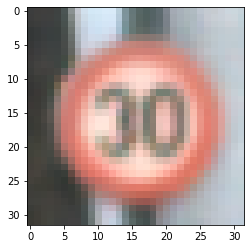

In [20]:
i = random.randint(0, 3500)
plt.imshow(x_train[i])
y_train[i]

2

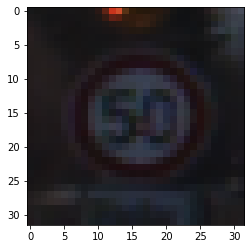

In [21]:
i = random.randint(0, 3500)
plt.imshow(x_test[i])
y_test[i]

40

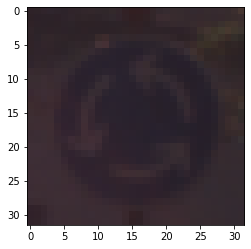

In [22]:
i = random.randint(0, 3500)
plt.imshow(x_valid[i])
y_valid[i]

In [24]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

In [34]:
x_train_gray = np.sum(x_train / 3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test / 3, axis=3, keepdims=True)
x_valid_gray = np.sum(x_valid / 3, axis=3, keepdims=True)

In [35]:
x_train_gray.shape

(34799, 32, 32, 1)

In [36]:
x_test_gray.shape

(12630, 32, 32, 1)

In [37]:
x_valid_gray.shape

(4410, 32, 32, 1)

In [38]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_valid_gray_norm = (x_valid_gray - 128) / 128

In [39]:
np.max(x_train_gray_norm)

0.9921875

In [40]:
np.min(x_train_gray_norm)

-0.9713541666666666

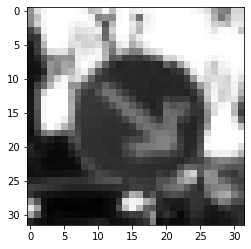

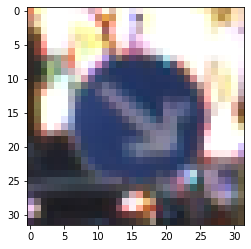

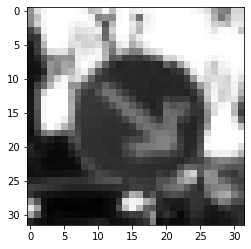

In [41]:
i = random.randint(0, 3500)
plt.imshow(x_train_gray[i].squeeze(), cmap="gray")
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap="gray")

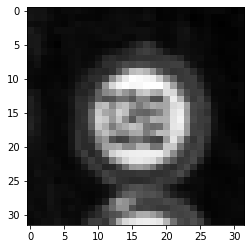

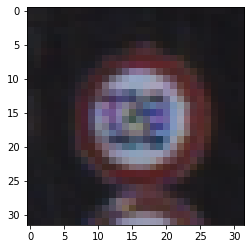

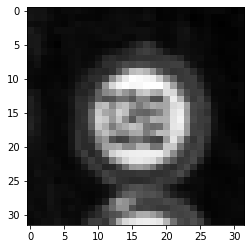

In [42]:
i = random.randint(0, 3500)
plt.imshow(x_test_gray[i].squeeze(), cmap="gray")
plt.figure()
plt.imshow(x_test[i])
plt.figure()
plt.imshow(x_test_gray_norm[i].squeeze(), cmap="gray")

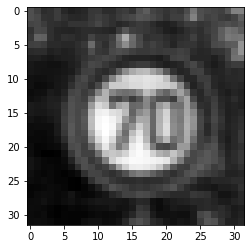

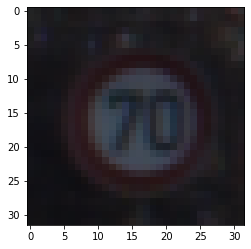

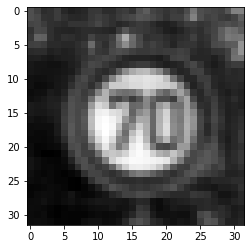

In [43]:
i = random.randint(0, 3500)
plt.imshow(x_valid_gray[i].squeeze(), cmap="gray")
plt.figure()
plt.imshow(x_valid[i])
plt.figure()
plt.imshow(x_valid_gray_norm[i].squeeze(), cmap="gray")

In [45]:
input_layer = layers.Conv2D(6, (5, 5), activation="relu", input_shape=(32, 32, 1))
avg_pool_layer = layers.AveragePooling2D()

conv1_layer = layers.Conv2D(16, (5, 5), activation="relu")
avg_pool_layer1 = layers.AveragePooling2D()

flatten_layer = layers.Flatten()

dense_layer1 = layers.Dense(120, activation="relu")
dense_layer2 = layers.Dense(84, activation="relu")
output_layer = layers.Dense(43, activation="softmax")


layers = [
    input_layer,
    avg_pool_layer,
    conv1_layer,
    avg_pool_layer1,
    flatten_layer,
    dense_layer1,
    dense_layer2,
    output_layer,
]


model = models.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [46]:
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [47]:
history = model.fit(
    x_train_gray_norm,
    y_train,
    batch_size=500,
    epochs=50,
    validation_data=(x_valid_gray_norm, y_valid),
)

Epoch 1/50
70/70 [==============================] - 18s 236ms/step - loss: 3.0429 - accuracy: 0.2190 - val_loss: 2.4935 - val_accuracy: 0.3571
Epoch 2/50
70/70 [==============================] - 16s 222ms/step - loss: 1.6653 - accuracy: 0.5369 - val_loss: 1.5418 - val_accuracy: 0.5662
Epoch 3/50
70/70 [==============================] - 16s 222ms/step - loss: 0.9984 - accuracy: 0.7153 - val_loss: 1.1728 - val_accuracy: 0.6465
Epoch 4/50
70/70 [==============================] - 16s 235ms/step - loss: 0.7190 - accuracy: 0.7960 - val_loss: 0.9637 - val_accuracy: 0.7154
Epoch 5/50
70/70 [==============================] - 16s 222ms/step - loss: 0.5653 - accuracy: 0.8451 - val_loss: 0.8553 - val_accuracy: 0.7605
Epoch 6/50
70/70 [==============================] - 15s 221ms/step - loss: 0.4788 - accuracy: 0.8676 - val_loss: 0.7490 - val_accuracy: 0.7703
Epoch 7/50
70/70 [==============================] - 16s 223ms/step - loss: 0.4034 - accuracy: 0.8907 - val_loss: 0.7717 - val_accuracy: 0.7800

In [51]:
score = model.evaluate(x_test_gray_norm, y_test)

395/395 [==============================] - 4s 11ms/step - loss: 1.4261 - accuracy: 0.8558


In [52]:
print(score)

[1.4261202812194824, 0.8558194637298584]


In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

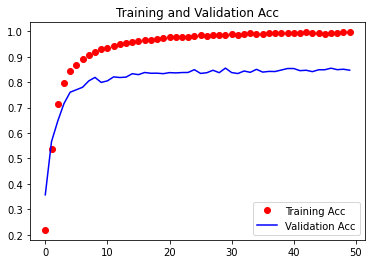

In [58]:
epochs = range(len(acc))
plt.plot(epochs, acc, "bo", color="r", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and Validation Acc")
plt.legend();

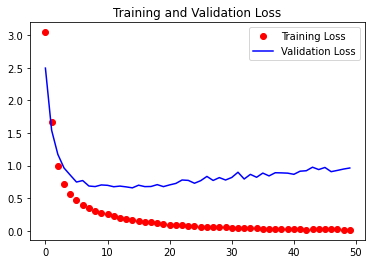

In [59]:
epochs = range(len(acc))
plt.plot(epochs, loss, "bo", color="r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend();

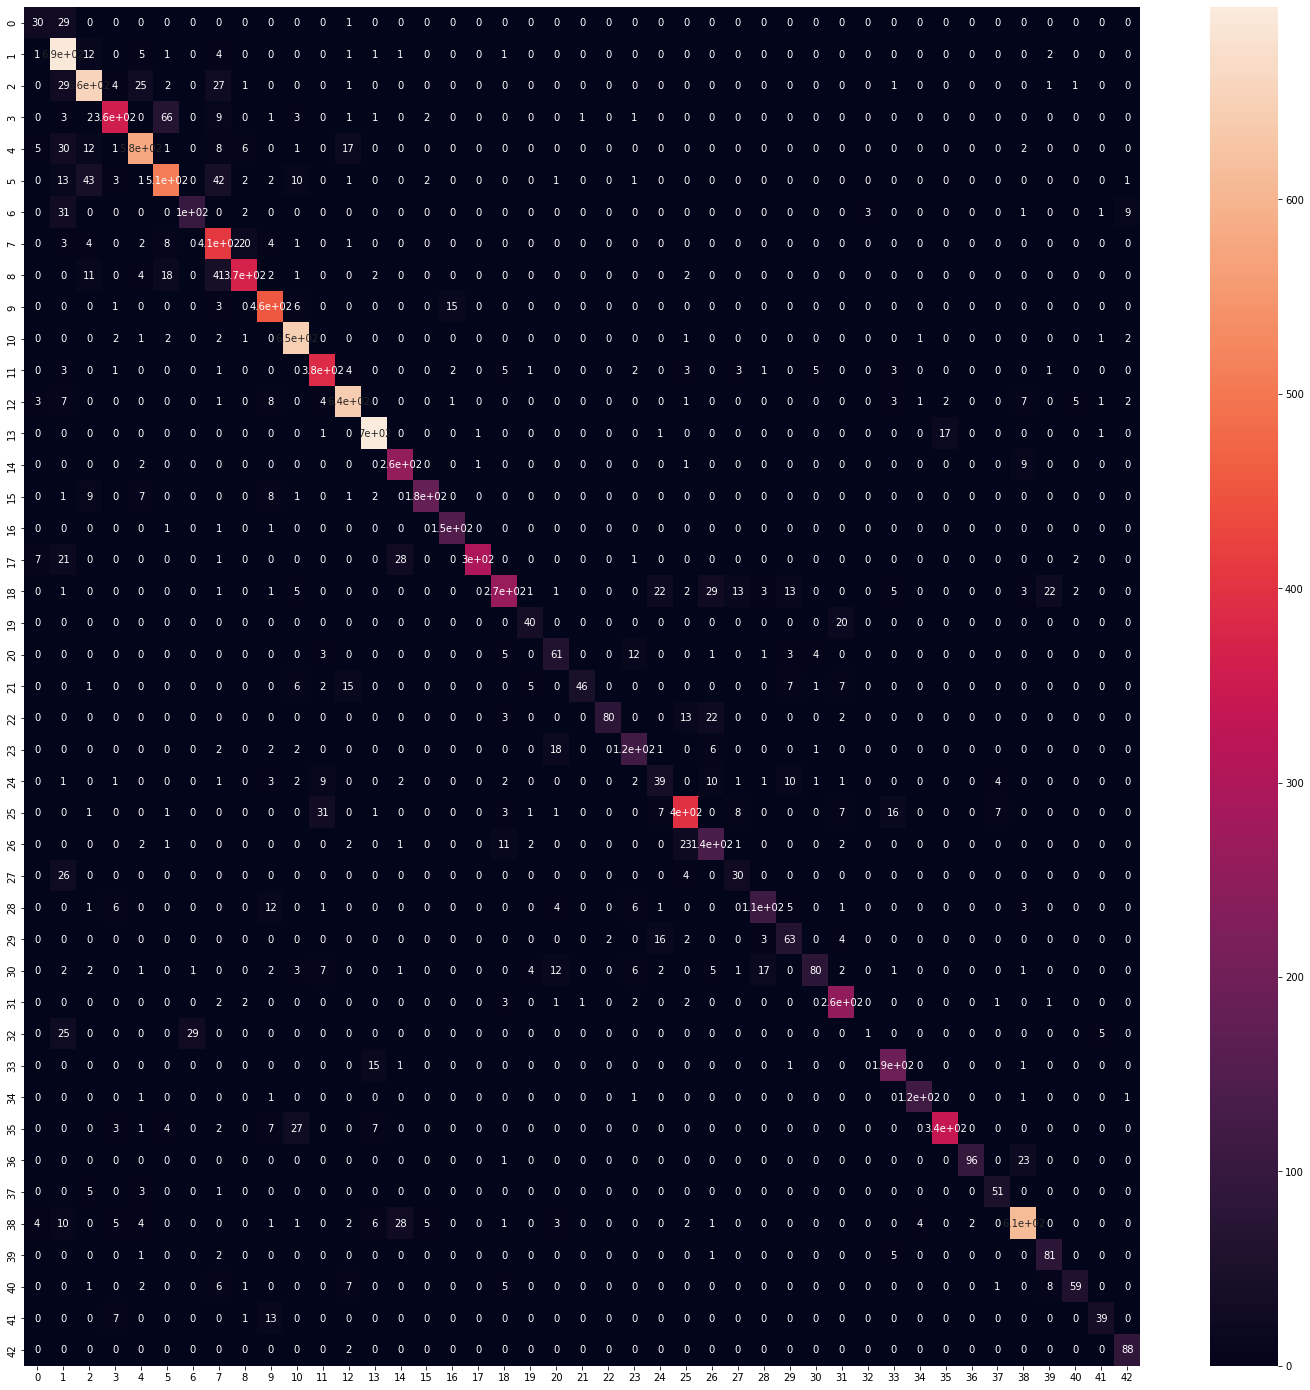

In [63]:
from sklearn.metrics import confusion_matrix

# pred_class = model.predict_classes(x_test_gray_norm) -> para versão tensorflow abaixo de 2.5
preds = model.predict(x_test_gray_norm)  # para versao tensorflow acima de 2.6
pred_class = np.argmax(preds, axis=1)
y_true = y_test

cm = confusion_matrix(y_true, pred_class)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True);

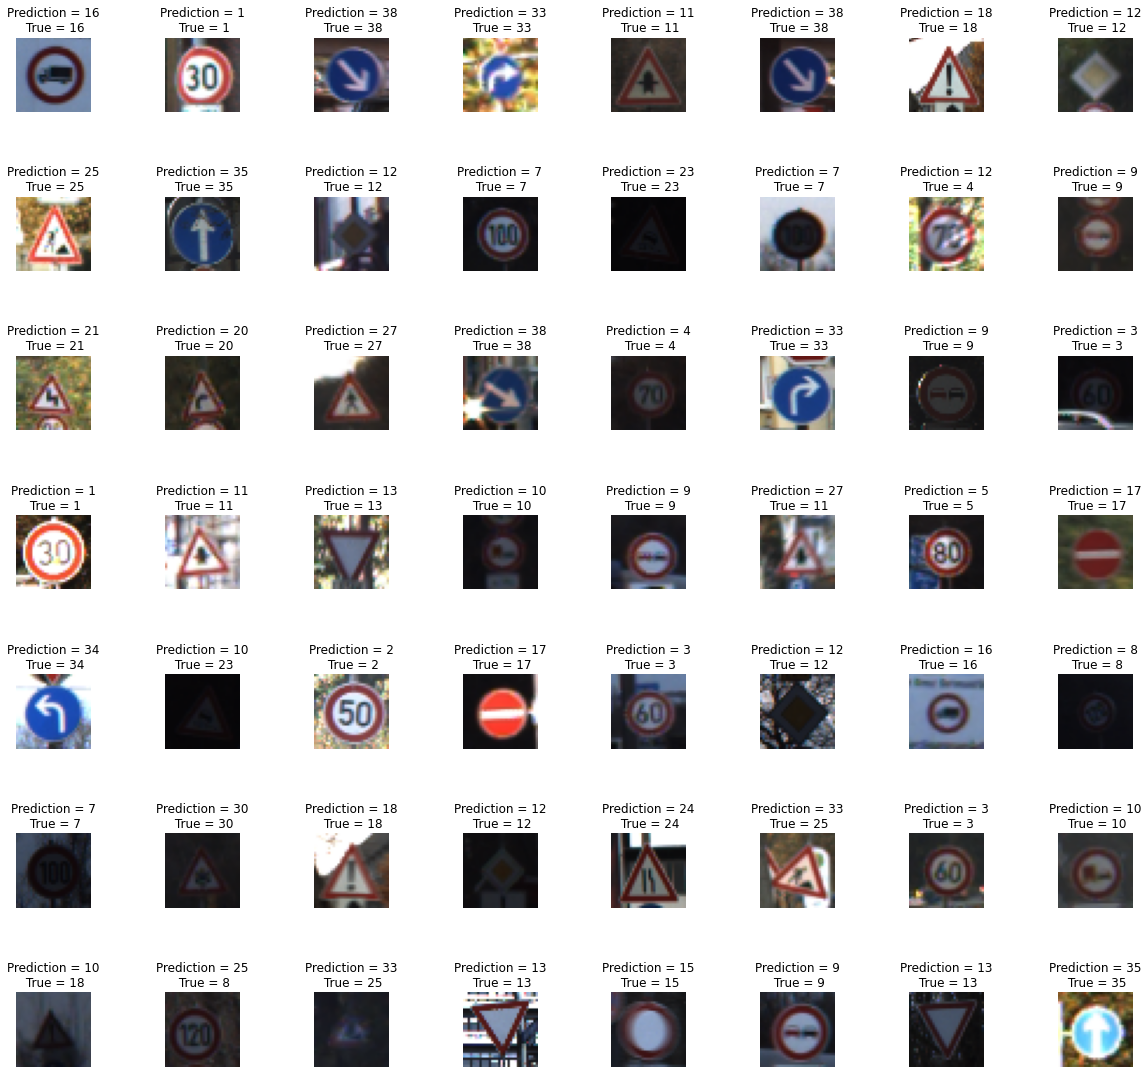

In [65]:
L = 7
W = 8

fig, axs = plt.subplots(L, W, figsize=(20, 20))
axs = axs.ravel()

for i in np.arange(0, L * W):
    axs[i].imshow(x_test[i])
    axs[i].set_title("Prediction = {}\n True = {}".format(pred_class[i], y_true[i]))
    axs[i].axis("off")

plt.subplots_adjust(wspace=1)